In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
%matplotlib inline

In [3]:
iris = load_iris()

In [190]:
idx = np.in1d(iris.target, [0,1])
X = iris.data[idx, 0:2]
y = iris.target[idx]

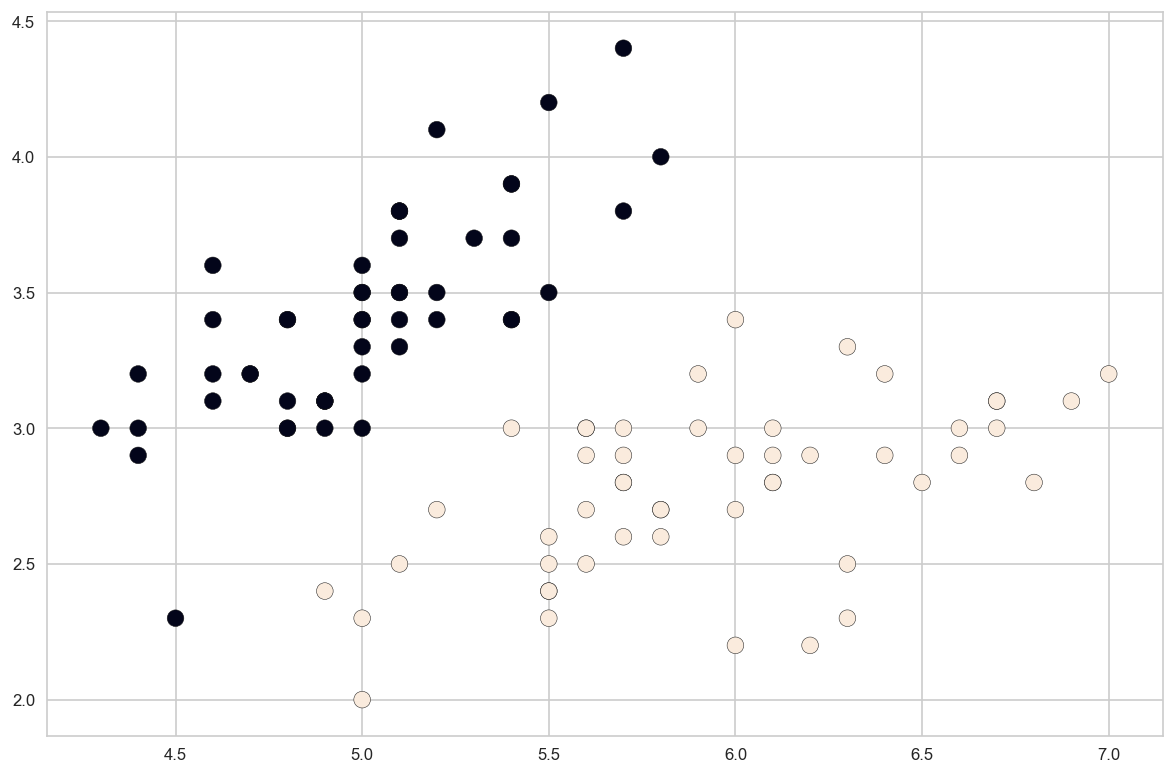

In [220]:
plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
plt.show()

In [239]:
model = SVC(C=1e10, kernel='linear').fit(X,y)

In [240]:
model.n_support_

array([2, 2])

In [241]:
model.support_

array([36, 41, 57, 84])

In [242]:
model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

In [243]:
model.coef_

array([[ 6.31777572, -5.26481134]])

In [244]:
y[model.support_]

array([0, 0, 1, 1])

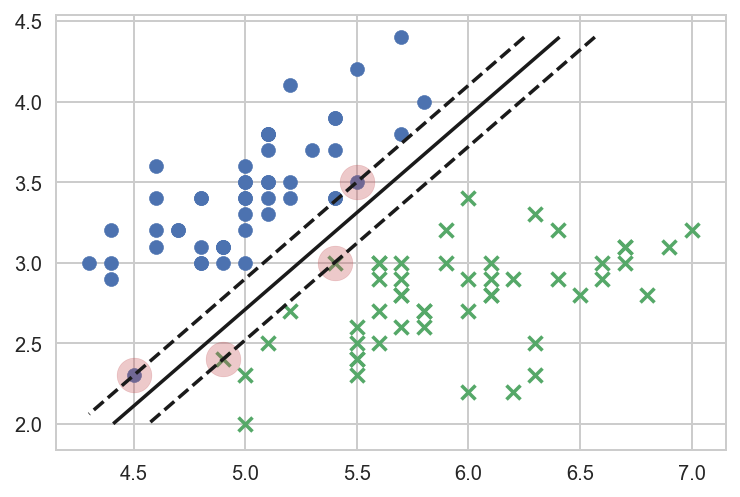

In [245]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], 
            model.support_vectors_[:,1], 
            s=300, alpha=0.3)

# x_new = [5.9, 3.1]
# plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()

In [120]:
model.decision_function([x_new])

array([0.68977465])

In [246]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import *

In [247]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


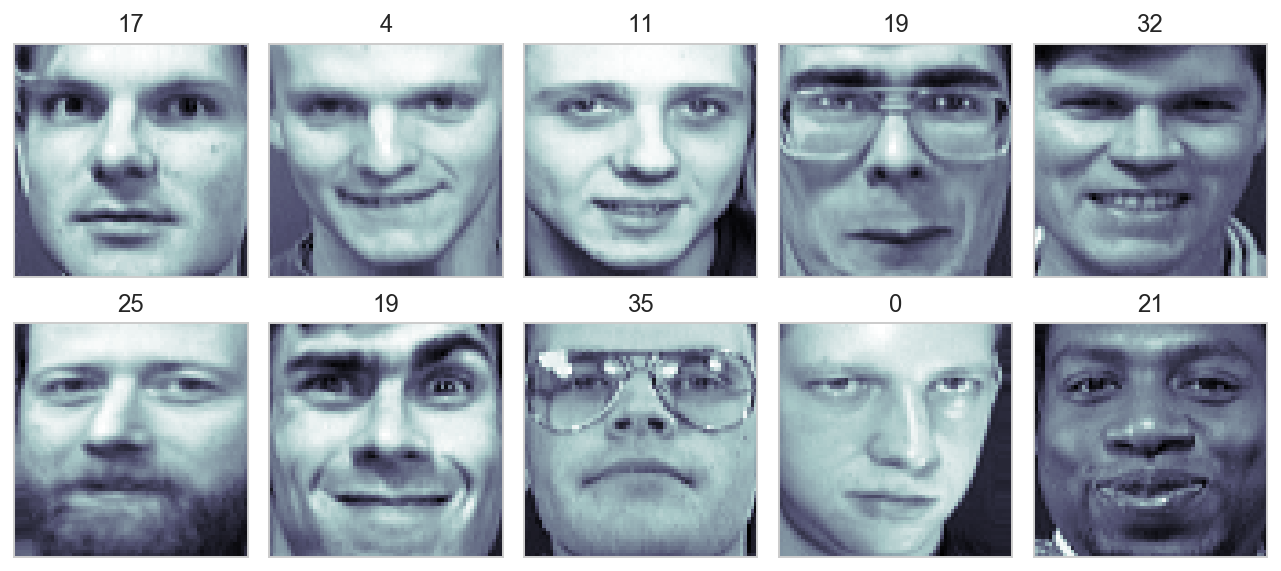

In [248]:
N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [250]:
svc_1 = SVC(kernel='linear').fit(X_train, y_train)

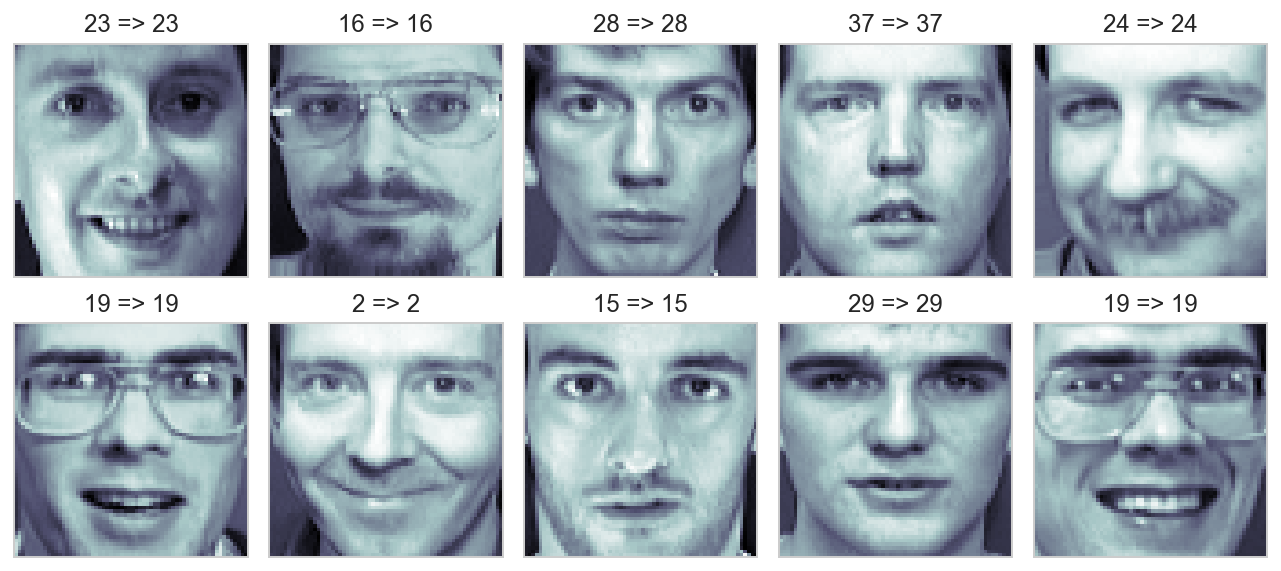

In [251]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc_1.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [252]:
glasses = [
    (10,  19), (30,  32), (37,  38), (50,  59), (63,  64),
    (69,  69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
]


def create_target(segments):
    y = np.zeros(faces.target.shape[0])
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y


target_glasses = create_target(glasses)
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_glasses, test_size=0.25, random_state=0)

svc_2 = SVC(kernel='linear').fit(X_train, y_train)

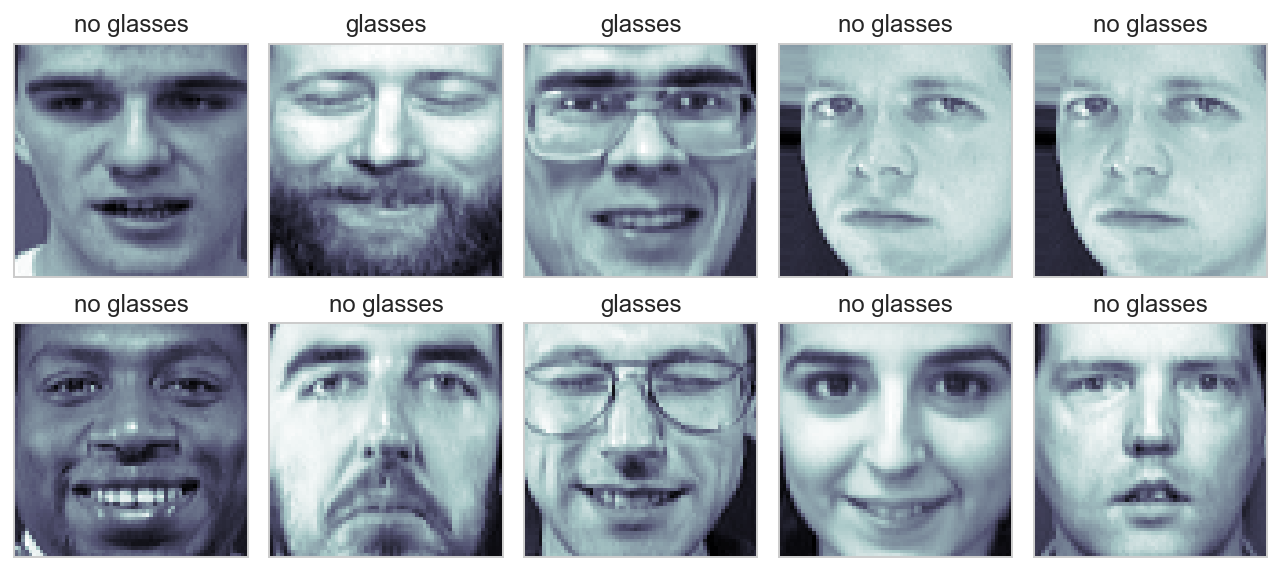

In [253]:
N=2; M=5;
np.random.seed(0)
fig = plt.figure(figsize=(9,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i*M+j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64,64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%s" %  ("glasses" if (svc_2.predict(X_test[k:(k+1), :])[0]) else "no glasses"))
plt.tight_layout()
plt.show()

In [255]:
result = sk.metrics.confusion_matrix(y_test,svc_2.predict(X_test))

In [256]:
result

array([[66,  1],
       [ 0, 33]], dtype=int64)

In [262]:
result1 = sk.metrics.classification_report(svc_2.predict(X_test),y_test)

In [263]:
result1

'             precision    recall  f1-score   support\n\n        0.0       0.99      1.00      0.99        66\n        1.0       1.00      0.97      0.99        34\n\navg / total       0.99      0.99      0.99       100\n'

# 커널 서포트 벡터 머신

In [265]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

In [267]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=4)

Wall time: 17.6 s
